In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA example - Marketing analytics

<a id='top'></a>

<div>
<img src="https://raw.githubusercontent.com/nlihin/data-analytics/main/images/marketing.PNG" width="400"/>
</div>


1. [Wrangling data](#section1)

   1.1 [Fix columns](#section1.1)   
   1.2 [Missing values](#section1.2)  
   1.3 [Melt the data](#melting)\
   1.4 [Outliers](#section1.4)    
   1.5 [Transformations](#section1.5)
  
2. [Understand the data](#section2)
3. [Correlations](#section3)
4. [Categorical data](#section4)

## New concepts:
[Melting data](#melting)\
[One-hot encoding](#onehot)


#### Information on the data
We'll work with a small marketing analytics dataset, taken from [iFood](https://www.crunchbase.com/organization/ifood)

Based on the example [here](https://www.kaggle.com/jennifercrockett/marketing-analytics-eda-task-final)

In [2]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/marketing_data.csv'
mrkt_df = pd.read_csv(url)
mrkt_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
mrkt_df.shape

(2240, 28)

Data description is [here](https://www.kaggle.com/jackdaoud/marketing-data)

<a id='section1'></a>
### 1. Wrangling data
[back to top](#top)

<a id='section1.1'></a>
#### 1.1 Fix columns

You may already notice something is strange with the Income column, is it aligned to the right??

Let's look at the types of data

In [4]:
mrkt_df.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

So here is the problem: the 'Income' column contains extra whitespace, clean it:

In [5]:
mrkt_df.columns = mrkt_df.columns.str.replace(' ', '')

And: the 'Income' column should be turned to numeric (float is better)\
regex: regular expression. We want the `$` sign treated as a string so regex should be set to False

In [6]:
mrkt_df.Income

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

---
#### <span style="color:blue"> Exercise:</span>
> Turn `Income` to float. You will need to get rid of the `$` and the `,` first. 

In [7]:
mrkt_df['Income'] = mrkt_df['Income'].str.replace('$', '', regex = False)

In [8]:
mrkt_df['Income'] = mrkt_df['Income'].str.replace(',', '').astype(float)

Sanity check:

In [9]:
mrkt_df.dtypes['Income']

dtype('float64')

In [10]:
mrkt_df.Income

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

<a id='section1.2'></a>
#### 1.2 Missing values
[back to top](#top)

In [11]:
mrkt_df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

The feature `Income` contains 24 null values

Plot this feature to identify best strategy for imputation:


<AxesSubplot: xlabel='Income', ylabel='Count'>

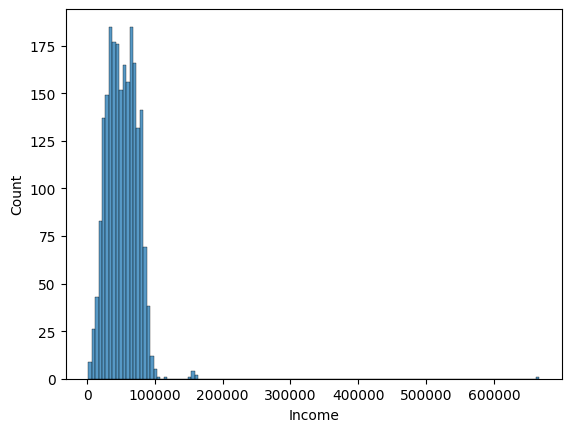

In [12]:
#mrkt_df['Income'] = mrkt_df['Income'].str.replace(',', '')
#mrkt_df['Income'] = mrkt_df['Income'].astype(float)

sns.histplot(mrkt_df, x = 'Income')

We see most of the incomes are between 0-10000. We can confirm this with a box plot:

<AxesSubplot: ylabel='Income'>

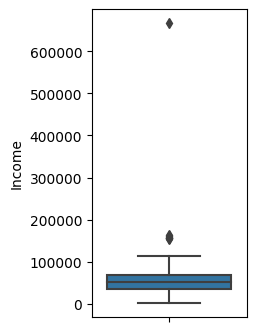

In [13]:
plt.figure(figsize=(2,4))
sns.boxplot(data = mrkt_df, y= 'Income')

Therefore, the best will be to fill the missing values with the median value and not the mean

In [14]:
mrkt_df['Income'] = mrkt_df['Income'].fillna(mrkt_df['Income'].median())

Use a log scale to display the income, so that the display is centered.

<AxesSubplot: xlabel='Income', ylabel='Count'>

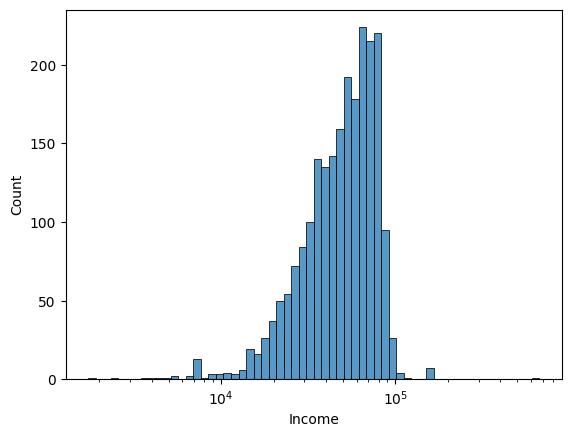

In [15]:
sns.histplot(mrkt_df.Income, log_scale=True)

<a id='melting'></a>
#### 1.3 Melt the data
Melt the data into long format, so that we can explore all of it at once\
[back to top](#top)

In [16]:
features = ['ID','Year_Birth', 'Income', 'Kidhome', 'Teenhome','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth' ]

In [17]:
melted_mrkt_df = pd.melt(mrkt_df[features], id_vars = 'ID', value_vars = features)
melted_mrkt_df

,ID,variable,value
0,1826,Year_Birth,1970.0
1,1,Year_Birth,1961.0
2,10476,Year_Birth,1958.0
3,1386,Year_Birth,1967.0
4,5371,Year_Birth,1989.0
...,...,...,...
35835,10142,NumWebVisitsMonth,4.0
35836,5263,NumWebVisitsMonth,8.0
35837,22,NumWebVisitsMonth,8.0
35838,528,NumWebVisitsMonth,3.0


<a id='section1.4'></a>
#### 1.4 Noisy data - outliers
[back to top](#top)

We want to skim through the data and see if it looks ok. 

So plot boxplots for data that is numeric, except binary data and the ID's

Select only numeric columns:

We are interested in creating a different boxplot for each `variable`, which is why `col="variable"`

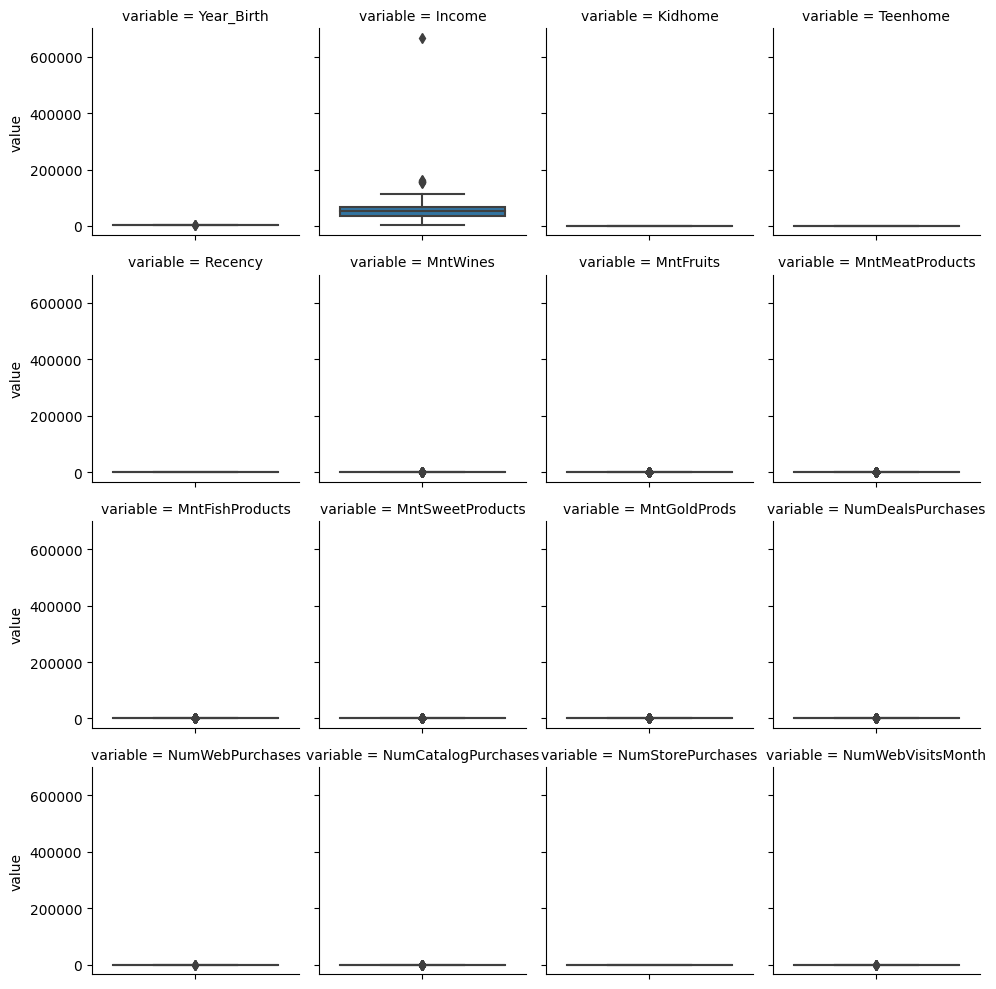

In [18]:
g = sns.FacetGrid(data = melted_mrkt_df, col="variable",  col_wrap=4, height=2.5)
g.map_dataframe(sns.boxplot, y = 'value')
plt.show()

#### <span style="color:blue"> Exercise:</span>
>
> It's hard to read this, because axis y is shared
>
> What can we do??
>
> Hint: google `FacetGrid`

#### Treat the outliers
> Do something with the birth years
>

In [19]:
mrkt_df.Year_Birth.sort_values(ascending=True)

513     1893
827     1899
2233    1900
2171    1940
1740    1941
        ... 
697     1995
964     1995
1468    1995
1824    1996
562     1996
Name: Year_Birth, Length: 2240, dtype: int64

In [20]:
mrkt_df = mrkt_df[mrkt_df.Year_Birth>1922].copy()

<AxesSubplot: ylabel='Year_Birth'>

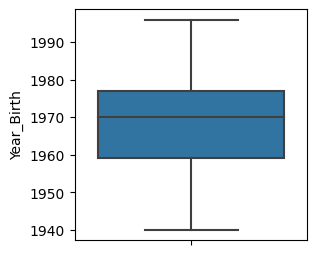

In [21]:
plt.figure(figsize=(3,3))
sns.boxplot( y = 'Year_Birth', data = mrkt_df)

In [22]:
mrkt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2237 non-null   float64
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   int64  
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  NumDealsPurchases    2237 non-null   i

<a id='section1.5'></a>
#### 1.5 Transformations
[back to top](#top)

Change the date column to a date type

In [23]:
mrkt_df['Dt_Customer'] = pd.to_datetime(mrkt_df['Dt_Customer'])

In [24]:
mrkt_df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Response                        int64
Complain    

<a id='section2'></a>
### 2. Understand the data
[back to top](#top)

To find patterns in the data, we need to find correlations in the data

In [ ]:
corrs = mrkt_df.corr(method = 'kendall', numeric_only=True)
plt.figure(figsize=(15,8))  #figure size
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True)

Difficult to look for correlations in this way. So we need to first transform the data, aggregate some of the fields

The total number of dependents in the home ('Dependents') can be engineered from the sum of 'Kidhome' and 'Teenhome'

In [ ]:
mrkt_df['Dependents'] = mrkt_df['Kidhome'] + mrkt_df['Teenhome']

The year of becoming a customer ('Year_Customer') can be engineered from 'Dt_Customer'

In [ ]:
mrkt_df['Year_Customer'] = pd.DatetimeIndex(mrkt_df['Dt_Customer']).year

The total amount spent ('TotalMnt') can be engineered from the sum of all features containing the keyword 'Mnt'

We will use [list comprehension](https://docs.python.org/3.4/tutorial/datastructures.html#list-comprehensions) to do that 

A list comprehension consists of brackets containing an expression followed by a for clause, then zero or more for or if clauses. 

In [ ]:
squares = []
for x in range(10):
    squares.append(x**2)
    squares
squares

In [ ]:
squares = [x**2 for x in range(10)]
squares

In [ ]:
mrkt_df.columns

In [ ]:
mnt_cols = [col for col in mrkt_df.columns if 'Mnt' in col]
mnt_cols

We have used `.sum()` to sum by columns. Now we want to sum rows. So `axis=1`

In [ ]:
mrkt_df['TotalMnt'] = mrkt_df[mnt_cols].sum(axis=1)

The total purchases ('TotalPurchases') can be engineered from the sum of all features containing the keyword 'Purchases'

In [ ]:
purchases_cols = [col for col in mrkt_df.columns if 'Purchases' in col]
mrkt_df['TotalPurchases'] = mrkt_df[purchases_cols].sum(axis=1)

The total number of campains accepted ('TotalCampaignsAcc') can be engineered from the sum of all features containing the keywords 'Cmp' and 'Response' (the latest campaign)

In [ ]:
campaigns_cols = [col for col in mrkt_df.columns if 'Cmp' in col] + ['Response'] # 'Response' is for the latest campaign
mrkt_df['TotalCampaignsAcc'] = mrkt_df[campaigns_cols].sum(axis=1)

Look at our new columns

In [ ]:
mrkt_df[['ID', 'Dependents', 'Year_Customer', 'TotalMnt', 'TotalPurchases', 'TotalCampaignsAcc', 'NumDealsPurchases']].head(10)

<a id='section3'></a>
### 3. Correlations - patterns in the data
[back to top](#top)

So now we are ready to search for correlations again

#### To understand what type of correlation, plot the histograms

In [72]:
features = ['Income', 'Dependents','TotalMnt','TotalPurchases', 'TotalCampaignsAcc', 'NumWebVisitsMonth', 'NumWebPurchases', 'NumDealsPurchases']

In [37]:
melted_mrkt_df = pd.melt(mrkt_df[features], id_vars = 'ID', value_vars = features)

To understand what type of correlation, plot the histograms

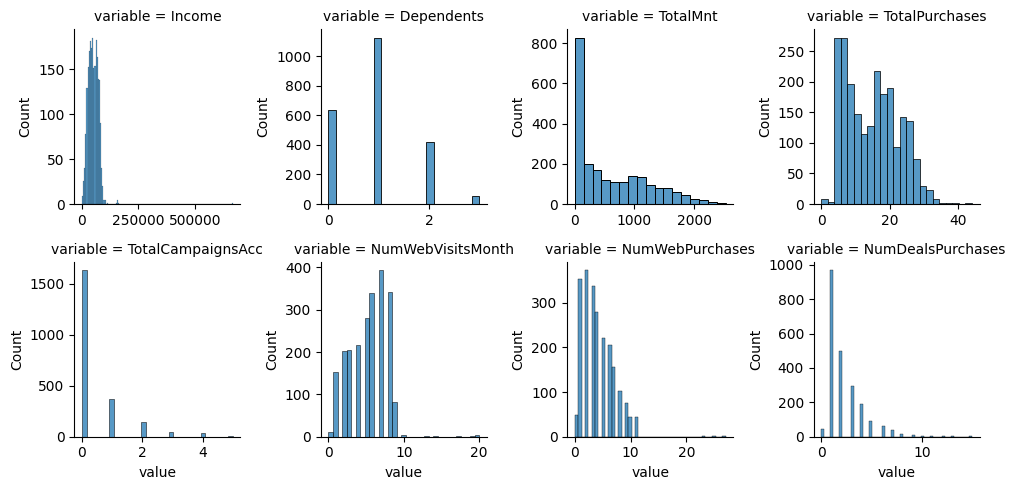

In [38]:
ggg = sns.FacetGrid(data = melted_mrkt_df, col="variable",  col_wrap=4, sharex = False, sharey= False, height = 2.5)
ggg.map_dataframe(sns.histplot, x = 'value')
plt.show()

This is not even close to a normal distribution, so use kendall-tau

#### New correlation heatmap:

In [ ]:
corrs = mrkt_df[features].corr(method = 'kendall')

plt.figure(figsize=(10,5))  #figure size
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True)

We found some correlations :-)

Let's begin with income and spendings

In [ ]:
plt.figure(figsize=(4,3))
sns.regplot(x='Income', y='TotalMnt', data=mrkt_df);

the same, but remove the outliers:

### <span style="color:blue"> Exercise:</span>
> Plot the same graph, but remove the outlier


In [86]:
plt.figure(figsize=(4,3))
plt.show()

<Figure size 400x300 with 0 Axes>

---
### <span style="color:green"> Observation 1:</span>
>
>The higher the income is, the more you spend
>
> (a bit trivial, not a very good observation)
---

A plot illustrating negative effect of having dependents (kids & teens) on spending:
    


In [ ]:
plt.figure(figsize=(4,3))
sns.regplot(x='Dependents', y='TotalMnt', data=mrkt_df);

A linear plot doesn't look good here since data is discrete (same for ordinal data - e.g. - none, few, many)

### <span style="color:blue"> Exercise:</span>
> Try another graph. What will look better?


In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='TotalMnt', data=mrkt_df)

A plot illustrating positive effect of having dependents (kids & teens) on number of deals purchased:

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Dependents', y='NumDealsPurchases', data=mrkt_df)

plot side-by-side so it will be easier to see

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
plt.subplots_adjust(wspace = 0.3)
sns.boxplot(x='Dependents', y='TotalMnt', data=mrkt_df, ax = ax[0])
sns.boxplot(x='Dependents', y='NumDealsPurchases', data=mrkt_df, ax = ax[1])
plt.show()

---
### <span style="color:green"> Observation 2:</span>

>
>People with more kids spend less
>
>People with more kids buy more deals


---

Plots illustrating the positive effect of campaigns

In [ ]:
plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignsAcc', y='TotalMnt', data=mrkt_df);

---
### <span style="color:green"> Observation 3:</span>
>
>Campaigns seem to be working

---


### <span style="color:green"> Observation???</span>
>
> Campigns don't seem to corrolate with deals, even for different countries (this may be a good thing)
>
> This is not really an observation, since it doesn't focus on finding a new connection. It is only an observation if the company currently believes that there is a connection and you're proving them wrong.
---

What about web visits and web purchases?

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(8, 4))
sns.regplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=mrkt_df, ax=ax[0])
sns.regplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=mrkt_df, ax = ax[1])
plt.subplots_adjust(wspace = 0.3)

---

### <span style="color:green"> Observation 4:</span>
>
> Number of web visits in the last month is not positively correlated with number of web purchases
>
> Instead, it is positively correlated with the number of deals purchased, suggesting that the website is effective in stimulating purchases

---

<a id='section4'></a>

<a id='section4'></a>
### 4. Categorical data
[back to top](#top)


<div>
<img src="https://raw.githubusercontent.com/nlihin/data-analytics/main/images/categories.jpeg" width="500"/>
</div>


lets look at our non-numeric data:

In [ ]:
non_numeric_columns = mrkt_df.select_dtypes(exclude=['int64', 'float64'])
non_numeric_columns.info()

Three of these features are categorical: `Education`, `Marital_Status`, `Country`

### <span style="color:blue"> Exercise:</span>
> Visualize these features, using `sns.countplot`


In [ ]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=3)
sns.countplot(ax=axes[0])
#sns.countplot(ax=axes[1])
#sns.countplot(ax=axes[2])
plt.show()

Let's look at the marital status:

In [ ]:
mrkt_df.groupby('Marital_Status')[['ID']].count()

##### Is there a correlation between marital status and spendings?

Create a df that holds only the status's we're interested in - the four biggest categories

In [ ]:
status_mrkt = mrkt_df.loc[(mrkt_df.Marital_Status  == 'Single')|(mrkt_df.Marital_Status == 'Married')|(mrkt_df.Marital_Status == 'Together')|\
                          (mrkt_df.Marital_Status == 'Divorced')].copy()

<a id='onehot'></a>
#### One hot encoding
[back to top](#top)

Create one-hot encodings for the categorical variables

Note: use smartly, so as not to add too many dimensions

In [ ]:
features2 = ['Income', 'Dependents','TotalMnt','TotalPurchases', 'TotalCampaignsAcc',\
             'NumDealsPurchases', 'NumWebVisitsMonth', 'NumWebPurchases', 'Marital_Status', 'Response']

status_mrkt_with_dummies = pd.get_dummies(status_mrkt[features2])


In [ ]:
status_mrkt_with_dummies.head()

One-hot encoding doesn't affect variables that are not categorical

In [ ]:
corrs = status_mrkt_with_dummies.corr(method = 'kendall')

plt.figure(figsize=(10,7))  #figure size
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

---

### <span style="color:green"> Observation???</span>
>
> There isn't any correlation between martial staus and spendings
>
>##### Observations should focus on what there IS, not what there isn't
>
>Let's try to look at the response to campgains

---



### <span style="color:blue"> Exercise:</span>
Is there a connection between the status, dependents and response?
> groupby `Marital_Status` and `Dependents` to find out


If we want a table, we can groupby, and then unstack:

In [ ]:
table_mrkt = status_mrkt.groupby(['Marital_Status', 'Dependents'])['Response' ].mean().unstack()
table_mrkt

Or we can use a pivot table to obtain the same results:

In [ ]:
status_mrkt.pivot_table('Response', index='Marital_Status', columns='Dependents', aggfunc='mean')  #aggfunc = 'mean' is the default

Why would we want a table? Because with a table it's easier to figure out what's going on and what we should plot

Single & Divorced with no kids are more likly to respond to a campaign

In [ ]:
plt.figure(figsize=(5,4))
#plt.xticks(rotation=90)
ax = sns.barplot(data = status_mrkt, x='Marital_Status', y='Response', hue = 'Dependents',errorbar=None)
ax.set(ylabel='average response')
plt.legend(title='Dependents', loc=('upper right')) #the legend position
plt.show()

---

### <span style="color:green"> Observation 5:</span>
>
> Single & Divorced with no kids are more likly to respond to a campaign - average response is higher than 30%
>
> Married & Together with no kids respond at around 20%
>

 

---

remeber we plotted categorical variables?

In [ ]:
plt.figure(figsize=(4,3))
plt.xticks(rotation=45)
sns.countplot(x="Marital_Status", data=mrkt_df);

since there are almost no widows, 'YOLO's, alones and 'Absurd's, we ignore them

##### Note: this doesn't just make the figure look prettier. It's important to ignore them. We don't want to reach a conclusion if based on 2-3 YOLO's..

Is this it? No!! There is always more to do. We haven't touched country, education, or campaign responses and much more. 


---
> A summary of new functions:
>
>* `drop()` - remove labels or columns [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html?highlight=drop#pandas.DataFrame.drop)
>
>* `str.replace('x','y')` - replace string x with string y
>
>* `reset_index(drop=true)` - resets the index. As defult, the old index is added as a column. Use drop=True to avoid this. [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)
>
>* `plt.subplots_adjust` - a matplotlib function. adjusts space between the plots. [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html)
>
>* `sum(axis=1)` - sums the values according to the rows, instead of the default sum by columns
>
>* create a list using [list comprehension](https://docs.python.org/3.4/tutorial/datastructures.html#list-comprehensions) - "do something for data in dataframe if condition holds"
>
>* `catplot()` - plot categorical variables onto a grid. [documentation](https://seaborn.pydata.org/generated/seaborn.catplot.html)
>
>* `countplot()` - counts observations for each category (this is like a histogram, but for categorical data)
>
>* `pd.get_dummies()` - creates one-hot encodings for categorical variables. [documentation](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)
>
>* `unstack()` - change the hiearachy of data. [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html)
>
>* `pivot()` - create a pivot table to group and summarize data. [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html)
---